In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

velocity_window = 5 # 50ms
wavelet_window = 50  # 500ms

videodirectory = 'B:\HsinYi\DeepLabCut_Anthony\8videos_1400frames_relabled/videos/2023dlc_model/aligned/'
videoname = '*'
filenames=glob.glob(videodirectory+ 'wavelet/'+videoname+ '_croprotaligned01234_nonormalized_wavelet.npz')
filenames
filenames=[ x for x in filenames if "crouched" not in x ]
filenames=[ x for x in filenames if "Crouched" not in x ]
filenames=[ x for x in filenames if "piezo" not in x ]
filenames=[ x for x in filenames if "Piezo" not in x ]
#del filenames[16]

#filenames
len(filenames)

10

In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

velocity_window = 5 # 50ms
wavelet_window = 50  # 500ms

videodirectory = 'B:\HsinYi\DeepLabCut_Anthony\8videos_1400frames_relabled/videos/newvideo_allprey/aligned/'
videoname = '*'
filenames2=glob.glob(videodirectory+ 'cut_wavelet/'+videoname+ '_croprotaligned01234_nonormalized_wavelet.npz')
filenames2
#filenames=[ x for x in filenames if "Prey" not in x ]
#filenames=[ x for x in filenames if "crouched" not in x ]
#filenames=[ x for x in filenames if "Crouched" not in x ]


#filenames
len(filenames2)

20

In [4]:
for i in range(len(filenames2)):
    
    filenames.append(filenames2[i])
len(filenames)

30

In [5]:
csv_filenames = glob.glob('B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static/' + '*' + '_wavelet_timestep.csv')
csv_filenames =[ x for x in csv_filenames  if "piezo" not in x ]
csv_filenames =[ x for x in csv_filenames  if "Piezo" not in x ]
#csv_filenames
csv_filenames

['B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\011822 Spider Prey2-01182022163621-0000-1_trimmed_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\032122 Spider Prey-03212022154120-0000-1_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\032822 Spider Prey-03292022141808-0000-1_trimmed_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\042122 Spider Prey-04212022155848-0000_trimmed_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\081924 Spider Prey Pt1-08192024165524-0000_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\082024 Spider Prey Pt1-08202024

In [6]:
from umap.umap_ import nearest_neighbors
import umap

for i in range(len(filenames)):
    wavelet = np.load(filenames[i])
    wavelet_x = wavelet['arr_0']
    clip_time = wavelet_x.shape[0]
    print(clip_time)
    test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)
    ## half wavelet x
    ## try cutting first and end 1s
    #test_wavelet = test_wavelet[100:int(clip_time-100),:,25:50]
    test_wavelet = test_wavelet[:,:,25:50]
    test_wavelet = test_wavelet.reshape(int(clip_time), 25*5)
    if i <10:
         
        beh = np.load(
        # filenames[i].split('/wavelet\\')[0] + '/wavelet/' + filenames[i].split('/wavelet\\')[1].split('01234')[
        #     0] + '01234_nonormalized_wavelet_manuallabels.npy'
        # )
            filenames[i].split('/wavelet\\')[0] + '/wavelet/' + filenames[i].split('/wavelet\\')[1].split('01234')[
                0] + '01234_manual_labels.npy')
        test_wavelet = test_wavelet[0:len(beh),:]
       
    
    if i==0:
        data_sample = test_wavelet
    else:
        data_sample = np.append(data_sample, test_wavelet, axis=0)
data_sample.shape
n_data = data_sample.shape[0]

C:\Users\Gordus_Lab\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


5931
4769
2686
150
2504
8085
1448
1550
4875
1515
4874
1479
1536
1928
952
2315
378
1700
2184
6836
2866
3660
1146
487
2812
5516
6347
831
834
8246


In [7]:
data_sample2 = data_sample.reshape(data_sample.shape[0]*data_sample.shape[1])
data_sample2.shape

(10797750,)

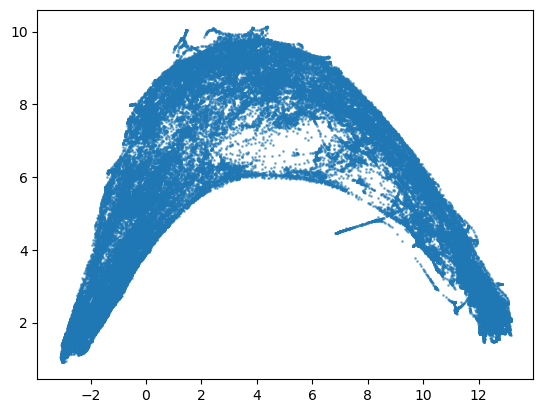

In [8]:
from umap.umap_ import nearest_neighbors
import umap
umap_model = umap.UMAP(n_neighbors=100,
                                            min_dist=0,n_components=5).fit(data_sample)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(umap_model.embedding_[:, 0],
                   umap_model.embedding_[ :, 1],
                   s=1, alpha=0.5
           )

plt.show()        

In [9]:
from umap.umap_ import nearest_neighbors
import umap
sequences=[]
labeled_beh = []
observations=[]
for i in range(len(filenames)):
#for i in range(1):
    wavelet = np.load(filenames[i])
    wavelet_x = wavelet['arr_0']
    clip_time = wavelet_x.shape[0]
    if i<10:
        csv_file= csv_filenames[i]
        test = pd.read_csv(csv_file)
        j = 0
        spider_timeidx = np.zeros((clip_time))
            
        for (columnName, columnData) in test.iteritems():
            if j % 2 == 0:
                ts = columnData[0]
                ts = ts.astype(int)
            else:
                te = columnData[0]
                te = te.astype(int)
                if 'pulling' in columnName:
                    spider_timeidx[ts:te + 1] = 1
                elif 'walking' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'turning' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'shaking' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'wrapping' in columnName:
                    spider_timeidx[ts:te + 1] = 4
            j=j+1
    
        #spider_timeidx=spider_timeidx[100:int(clip_time-100)]
    
        
        wrap_idx = np.where(spider_timeidx[:]==4)
        spider_timeidx = np.delete(spider_timeidx, wrap_idx[0])
        spider_timeidx_str=[]
        for k in range(len(spider_timeidx)):
            if spider_timeidx[k]==0:
                spider_timeidx_str.append('0')
            elif spider_timeidx[k]==1:
                spider_timeidx_str.append('1')
            elif spider_timeidx[k]==2:
                spider_timeidx_str.append('2')
            elif spider_timeidx[k]==3:
                spider_timeidx_str.append('3')
            elif spider_timeidx[k]==4:
                spider_timeidx_str.append('4')
    
        test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)
        ## half wavelet x
        #f = wavelet['arr_2']
        test_wavelet = test_wavelet[:,:,25:50]
    
        
       ## try cutting first and end 1s
        #test_wavelet = test_wavelet[100:int(clip_time-100),:,25:50]
        
        test_wavelet = test_wavelet.reshape(int(clip_time), 25*5)
        test_wavelet = np.delete(test_wavelet, wrap_idx[0], axis=0)
    else:
        
        test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)
        test_wavelet = test_wavelet[:,:,25:50]
        test_wavelet = test_wavelet.reshape(int(clip_time), 25*5)

    ### Here just adding "empty" labels for data structure. So there is no real label in the dataset.
    spider_timeidx_str = ['' for _ in range(int(test_wavelet.shape[0]))]
    normal_embeddings = umap_model.transform(test_wavelet)

    umap1 = normal_embeddings[:,0]
    umap2 = normal_embeddings[:,1]
    umap3 = normal_embeddings[:,2]
    umap4 = normal_embeddings[:,3]
    umap5 = normal_embeddings[:,4]
    #umap6 = normal_embeddings[:,5]
    #umap7 = normal_embeddings[:,6]
    #umap8 = normal_embeddings[:,7]


            
    observations_temp = list(zip(umap1, umap2, umap3, umap4, umap5))
    labeled_data_temp = [(obs, state) for obs, state in zip(observations_temp, spider_timeidx_str)]
    sequences_temp, label_temp = zip(*labeled_data_temp)
    

    sequences.append(sequences_temp)
    labeled_beh.append(label_temp)
    observations.append(list(zip(umap1, umap2, umap3, umap4, umap5)))


B:\TMP\ipykernel_37764\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_37764\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_37764\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_37764\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_37764\394975289.py:20: RuntimeWarning: invalid value encountered in cast
  ts = ts.astype(int)
B:\TMP\ipykernel_37764\394975289.py:23: RuntimeWarning: invalid value encountered in cast
  te = te.astype(int)
B:\TMP\i

In [10]:
observation_extend=[]

for i in range(len(observations)):
    observation_extend.extend(observations[i])
len(observation_extend)

86382

In [57]:
len(observations)

30

In [35]:
##Unsupervised
import random
from sklearn.cluster import KMeans
import numpy as np
from pomegranate import *


n_state = 1

bics_1=[]

D=5

k = (D+D*(D+1)/2) * n_state + n_state*(n_state-1)+(n_state-1)



    
    
observation_extend=[]
for i in range(len(observations)):
    observation_extend.extend(observations[i])
n_data = len(observation_extend)
    
    
    
    
label_predict  = KMeans(n_clusters=n_state, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))
label_predict_extend=[]
    
for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))
    

states = ["0"]
    
# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}
    
# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]
    
# Create the HMM model
model_train = HiddenMarkovModel()
    
# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]
    
    
# Add the states to the model
model_train.add_states(hidden_states)
    

initial_probabilities = [np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])

    
    
 # Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
        [np.random.rand()],

]
    
for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])
    
    
# Finalize the model
model_train.bake()

model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                                max_iterations=500, stop_threshold=1e-5,
                                return_history=True)  # Use Baum-Welch algorithm
    
for i in range(len(observations)):
    ll = model_train.log_probability(observations[i])
    N = len(observations[i])  # total number of observations
    bic = -2 * ll + k * np.log(N)
    

        

    bics_1.append(bic)


print(np.mean(bics_1))


[1] Improvement: 0.0006642324151471257	Time (s): 0.1957
[2] Improvement: 0.0	Time (s): 0.1942
[3] Improvement: 3.4924596548080444e-10	Time (s): 0.1996
[4] Improvement: 6.984919309616089e-10	Time (s): 0.1939
[5] Improvement: -1.1641532182693481e-09	Time (s): 0.1958
[6] Improvement: 3.4924596548080444e-10	Time (s): 0.1925
[7] Improvement: 1.1641532182693481e-10	Time (s): 0.1963
[8] Improvement: 1.1641532182693481e-10	Time (s): 0.1935
[9] Improvement: 2.3283064365386963e-10	Time (s): 0.2061
[10] Improvement: -4.656612873077393e-10	Time (s): 0.1922
[11] Improvement: 3.4924596548080444e-10	Time (s): 0.1958
[12] Improvement: -2.3283064365386963e-10	Time (s): 0.1937
[13] Improvement: -2.3283064365386963e-10	Time (s): 0.1926
[14] Improvement: 2.3283064365386963e-10	Time (s): 0.192
[15] Improvement: 1.1641532182693481e-10	Time (s): 0.1935
[16] Improvement: -4.656612873077393e-10	Time (s): 0.192
[17] Improvement: 6.984919309616089e-10	Time (s): 0.1954
[18] Improvement: 0.0	Time (s): 0.1912
[19] 

In [12]:
##Unsupervised
import random
from sklearn.cluster import KMeans
import numpy as np
from pomegranate import *


n_state = 2
lls_2 =[]
bics_2=[]
nplls_2=[]
D=5

k = (D+D*(D+1)/2) * n_state + n_state*(n_state-1)+(n_state-1)



    
    
observation_extend=[]
for i in range(len(observations)):
    observation_extend.extend(observations[i])
n_data = len(observation_extend)
    
    
    
    
label_predict  = KMeans(n_clusters=n_state, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))
label_predict_extend=[]
    
for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))
    

states = ["0","1"]
    
# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}
    
# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]
    
# Create the HMM model
model_train = HiddenMarkovModel()
    
# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]
    
    
# Add the states to the model
model_train.add_states(hidden_states)
    

initial_probabilities = [np.random.rand(), np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])
model_train.add_transition(model_train.start, hidden_states[1], initial_probabilities[1])

    
    
 # Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
        [np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand()]
 
]
    
for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])
    
    
# Finalize the model
model_train.bake()

model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                                max_iterations=500, stop_threshold=1e-5,
                                return_history=True)  # Use Baum-Welch algorithm
    
for i in range(len(observations)):
    ll = model_train.log_probability(observations[i])
    N = len(observations[i])  # total number of observations
    bic = -2 * ll + k * np.log(N)
    

        

    bics_2.append(bic)


print(np.mean(bics_2))


[1] Improvement: 12013.668997804867	Time (s): 0.3196
[2] Improvement: 1880.9568761853152	Time (s): 0.3216
[3] Improvement: 1414.8472053342266	Time (s): 0.3216
[4] Improvement: 1351.3911312030395	Time (s): 0.3206
[5] Improvement: 662.7225923197693	Time (s): 0.3227
[6] Improvement: 324.51946809591027	Time (s): 0.3246
[7] Improvement: 167.7022873844253	Time (s): 0.3236
[8] Improvement: 70.4703823972377	Time (s): 0.3231
[9] Improvement: 26.441309130052105	Time (s): 0.3232
[10] Improvement: 9.086227416584734	Time (s): 0.3211
[11] Improvement: 3.15983223792864	Time (s): 0.3226
[12] Improvement: 1.1438390783732757	Time (s): 0.3256
[13] Improvement: 0.4362878277315758	Time (s): 0.3246
[14] Improvement: 0.17541430209530517	Time (s): 0.3226
[15] Improvement: 0.07378670119214803	Time (s): 0.3231
[16] Improvement: 0.03215142554836348	Time (s): 0.3236
[17] Improvement: 0.014379383355844766	Time (s): 0.3224
[18] Improvement: 0.006552383943926543	Time (s): 0.3251
[19] Improvement: 0.00302538403775542

In [15]:
##Unsupervised
import random
from sklearn.cluster import KMeans
import numpy as np
from pomegranate import *


n_state = 3
bics_3=[]

D=5

k = (D+D*(D+1)/2) * n_state + n_state*(n_state-1)+(n_state-1)

    
observation_extend=[]
for i in range(len(observations)):
    observation_extend.extend(observations[i])
n_data = len(observation_extend)
    
    
    
    
label_predict  = KMeans(n_clusters=n_state, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))
label_predict_extend=[]
    
for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))
    

states = ["0","1", "2"]
    
# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}
    
# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]
    
# Create the HMM model
model_train = HiddenMarkovModel()
    
# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]
    
    
# Add the states to the model
model_train.add_states(hidden_states)
    

initial_probabilities = [np.random.rand(), np.random.rand(), np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])
model_train.add_transition(model_train.start, hidden_states[1], initial_probabilities[1])
model_train.add_transition(model_train.start, hidden_states[2], initial_probabilities[2])
    
 # Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
        [np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand()]
 
]
    
for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])
    
    
# Finalize the model
model_train.bake()

model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                                max_iterations=500, stop_threshold=1e-5,
                                return_history=True)  # Use Baum-Welch algorithm
    
for i in range(len(observations)):
    ll = model_train.log_probability(observations[i])
    N = len(observations[i])  # total number of observations
    bic = -2 * ll + k * np.log(N)
    

        

    bics_3.append(bic)


print(np.mean(bics_3))


[1] Improvement: 102329.50435316481	Time (s): 0.4815
[2] Improvement: 3041.5756249986007	Time (s): 0.4849
[3] Improvement: 1235.876031724678	Time (s): 0.483
[4] Improvement: 838.3313095236663	Time (s): 0.485
[5] Improvement: 514.262258835719	Time (s): 0.4844
[6] Improvement: 402.89220688235946	Time (s): 0.4844
[7] Improvement: 402.87599723110907	Time (s): 0.4839
[8] Improvement: 299.68394798244117	Time (s): 0.4845
[9] Improvement: 240.91418635152513	Time (s): 0.4845
[10] Improvement: 160.77302339108428	Time (s): 0.4844
[11] Improvement: 158.5702825151384	Time (s): 0.4849
[12] Improvement: 153.67977835302008	Time (s): 0.4859
[13] Improvement: 136.31166189687792	Time (s): 0.483
[14] Improvement: 126.10493269131985	Time (s): 0.488
[15] Improvement: 93.91409184713848	Time (s): 0.4854
[16] Improvement: 54.73598477727501	Time (s): 0.4874
[17] Improvement: 37.578409095294774	Time (s): 0.4744
[18] Improvement: 26.949186803598423	Time (s): 0.4744
[19] Improvement: 28.9661068659625	Time (s): 0.4

In [17]:
##Unsupervised
import random
from sklearn.cluster import KMeans
import numpy as np
from pomegranate import *


n_state = 4
bics_4=[]

D=5

k = (D+D*(D+1)/2) * n_state + n_state*(n_state-1)+(n_state-1)

    
observation_extend=[]
for i in range(len(observations)):
    observation_extend.extend(observations[i])
n_data = len(observation_extend)
    
    
    
    
label_predict  = KMeans(n_clusters=n_state, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))
label_predict_extend=[]
    
for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))
    

states = ["0","1", "2", "3"]
    
# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}
    
# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]
    
# Create the HMM model
model_train = HiddenMarkovModel()
    
# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]
    
    
# Add the states to the model
model_train.add_states(hidden_states)
    

initial_probabilities = [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])
model_train.add_transition(model_train.start, hidden_states[1], initial_probabilities[1])
model_train.add_transition(model_train.start, hidden_states[2], initial_probabilities[2])
model_train.add_transition(model_train.start, hidden_states[3], initial_probabilities[3])   
 # Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand()]
 
]
    
for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])
    
    
# Finalize the model
model_train.bake()

model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                                max_iterations=500, stop_threshold=1e-5,
                                return_history=True)  # Use Baum-Welch algorithm
    
for i in range(len(observations)):
    ll = model_train.log_probability(observations[i])
    N = len(observations[i])  # total number of observations
    bic = -2 * ll + k * np.log(N)
    

        

    bics_4.append(bic)


print(np.mean(bics_4))


[1] Improvement: 103332.76939676411	Time (s): 0.6667
[2] Improvement: 2824.0644162534445	Time (s): 0.6727
[3] Improvement: 1006.1690066097071	Time (s): 0.6642
[4] Improvement: 1704.1818484347605	Time (s): 0.6651
[5] Improvement: 543.1474053253769	Time (s): 0.6652
[6] Improvement: 328.63785188883776	Time (s): 0.6677
[7] Improvement: 361.852760424139	Time (s): 0.6703
[8] Improvement: 504.43551734281937	Time (s): 0.6671
[9] Improvement: 446.08018531964626	Time (s): 0.6705
[10] Improvement: 582.8071509938454	Time (s): 0.6738
[11] Improvement: 645.5224667809671	Time (s): 0.6711
[12] Improvement: 498.7571891822736	Time (s): 0.6613
[13] Improvement: 240.58315327958553	Time (s): 0.6621
[14] Improvement: 113.40772280923557	Time (s): 0.6637
[15] Improvement: 80.48882889814558	Time (s): 0.6601
[16] Improvement: 71.05543432763079	Time (s): 0.6607
[17] Improvement: 81.63893744326197	Time (s): 0.6622
[18] Improvement: 89.0411495337903	Time (s): 0.6616
[19] Improvement: 87.46561721389298	Time (s): 0.

In [18]:
##Unsupervised
import random
from sklearn.cluster import KMeans
import numpy as np
from pomegranate import *


n_state = 5
bics_5=[]

D=5

k = (D+D*(D+1)/2) * n_state + n_state*(n_state-1)+(n_state-1)

    
observation_extend=[]
for i in range(len(observations)):
    observation_extend.extend(observations[i])
n_data = len(observation_extend)
    
    
    
    
label_predict  = KMeans(n_clusters=n_state, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))
label_predict_extend=[]
    
for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))
    

states = ["0","1", "2", "3", "4"]
    
# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}
    
# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]
    
# Create the HMM model
model_train = HiddenMarkovModel()
    
# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]
    
    
# Add the states to the model
model_train.add_states(hidden_states)
    

initial_probabilities = [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])
model_train.add_transition(model_train.start, hidden_states[1], initial_probabilities[1])
model_train.add_transition(model_train.start, hidden_states[2], initial_probabilities[2])
model_train.add_transition(model_train.start, hidden_states[3], initial_probabilities[3])   
model_train.add_transition(model_train.start, hidden_states[4], initial_probabilities[4])  
 # Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand()]
 
 
]
    
for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])
    
    
# Finalize the model
model_train.bake()

model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                                max_iterations=500, stop_threshold=1e-5,
                                return_history=True)  # Use Baum-Welch algorithm
    
for i in range(len(observations)):
    ll = model_train.log_probability(observations[i])
    N = len(observations[i])  # total number of observations
    bic = -2 * ll + k * np.log(N)
    

        

    bics_5.append(bic)


print(np.mean(bics_5))


[1] Improvement: 156942.13600348448	Time (s): 0.865
[2] Improvement: 4929.465262836602	Time (s): 0.8693
[3] Improvement: 1642.9956400513765	Time (s): 0.8732
[4] Improvement: 1064.7361499623512	Time (s): 0.8731
[5] Improvement: 631.8735214917106	Time (s): 0.8736
[6] Improvement: 280.51042411272647	Time (s): 0.8733
[7] Improvement: 108.06911174574634	Time (s): 0.8628
[8] Improvement: 71.53603581839707	Time (s): 0.8643
[9] Improvement: 45.799417305213865	Time (s): 0.8658
[10] Improvement: 24.465883326076437	Time (s): 0.8617
[11] Improvement: 14.890964835765772	Time (s): 0.8529
[12] Improvement: 9.41529561864445	Time (s): 0.8528
[13] Improvement: 8.039453800884075	Time (s): 0.8523
[14] Improvement: 15.708679484261665	Time (s): 0.8549
[15] Improvement: 86.00356683734572	Time (s): 0.8538
[16] Improvement: 814.3726497992757	Time (s): 0.8533
[17] Improvement: 752.2586209324654	Time (s): 0.8528
[18] Improvement: 47.56144504240365	Time (s): 0.8535
[19] Improvement: 23.6628028046689	Time (s): 0.8

In [19]:
##Unsupervised
import random
from sklearn.cluster import KMeans
import numpy as np
from pomegranate import *


n_state = 6
bics_6=[]

D=5

k = (D+D*(D+1)/2) * n_state + n_state*(n_state-1)+(n_state-1)

    
observation_extend=[]
for i in range(len(observations)):
    observation_extend.extend(observations[i])
n_data = len(observation_extend)
    
    
    
    
label_predict  = KMeans(n_clusters=n_state, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))
label_predict_extend=[]
    
for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))
    

states = ["0","1", "2", "3", "4", "5"]
    
# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}
    
# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]
    
# Create the HMM model
model_train = HiddenMarkovModel()
    
# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]
    
    
# Add the states to the model
model_train.add_states(hidden_states)
    

initial_probabilities = [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])
model_train.add_transition(model_train.start, hidden_states[1], initial_probabilities[1])
model_train.add_transition(model_train.start, hidden_states[2], initial_probabilities[2])
model_train.add_transition(model_train.start, hidden_states[3], initial_probabilities[3])   
model_train.add_transition(model_train.start, hidden_states[4], initial_probabilities[4])  
model_train.add_transition(model_train.start, hidden_states[5], initial_probabilities[5])  
 # Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand()]
 
 
]
    
for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])
    
    
# Finalize the model
model_train.bake()

model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                                max_iterations=500, stop_threshold=1e-5,
                                return_history=True)  # Use Baum-Welch algorithm
    
for i in range(len(observations)):
    ll = model_train.log_probability(observations[i])
    N = len(observations[i])  # total number of observations
    bic = -2 * ll + k * np.log(N)
    

        

    bics_6.append(bic)


print(np.mean(bics_6))


[1] Improvement: 161160.71316804524	Time (s): 1.087
[2] Improvement: 8854.615723362658	Time (s): 1.093
[3] Improvement: 931.2929243761464	Time (s): 1.086
[4] Improvement: 450.4786597546481	Time (s): 1.083
[5] Improvement: 339.63303160035866	Time (s): 1.086
[6] Improvement: 339.2066472482111	Time (s): 1.088
[7] Improvement: 432.58705970464507	Time (s): 1.076
[8] Improvement: 786.0729806461604	Time (s): 1.078
[9] Improvement: 515.0836151493422	Time (s): 1.068
[10] Improvement: 233.7014530656743	Time (s): 1.055
[11] Improvement: 102.31355168134905	Time (s): 1.047
[12] Improvement: 62.59670052587171	Time (s): 1.036
[13] Improvement: 35.95865544435219	Time (s): 1.038
[14] Improvement: 16.274185005691834	Time (s): 1.021
[15] Improvement: 7.920547604589956	Time (s): 1.025
[16] Improvement: 5.369951842469163	Time (s): 1.021
[17] Improvement: 3.747756437456701	Time (s): 1.024
[18] Improvement: 1.354727155820001	Time (s): 1.022
[19] Improvement: 0.4879426342085935	Time (s): 1.023
[20] Improvemen

In [20]:
##Unsupervised
import random
from sklearn.cluster import KMeans
import numpy as np
from pomegranate import *


n_state = 7
bics_7=[]

D=5

k = (D+D*(D+1)/2) * n_state + n_state*(n_state-1)+(n_state-1)

    
observation_extend=[]
for i in range(len(observations)):
    observation_extend.extend(observations[i])
n_data = len(observation_extend)
    
    
    
    
label_predict  = KMeans(n_clusters=n_state, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))
label_predict_extend=[]
    
for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))
    

states = ["0","1", "2", "3", "4", "5","6"]
    
# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}
    
# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]
    
# Create the HMM model
model_train = HiddenMarkovModel()
    
# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]
    
    
# Add the states to the model
model_train.add_states(hidden_states)
    

initial_probabilities = [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])
model_train.add_transition(model_train.start, hidden_states[1], initial_probabilities[1])
model_train.add_transition(model_train.start, hidden_states[2], initial_probabilities[2])
model_train.add_transition(model_train.start, hidden_states[3], initial_probabilities[3])   
model_train.add_transition(model_train.start, hidden_states[4], initial_probabilities[4])  
model_train.add_transition(model_train.start, hidden_states[5], initial_probabilities[5])  
model_train.add_transition(model_train.start, hidden_states[6], initial_probabilities[6]) 
 # Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
        [np.random.rand(), np.random.rand(), np.random.rand(),  np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()]
 
 
]
    
for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])
    
    
# Finalize the model
model_train.bake()

model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                                max_iterations=500, stop_threshold=1e-5,
                                return_history=True)  # Use Baum-Welch algorithm
    
for i in range(len(observations)):
    ll = model_train.log_probability(observations[i])
    N = len(observations[i])  # total number of observations
    bic = -2 * ll + k * np.log(N)
    

        

    bics_7.append(bic)


print(np.mean(bics_7))


[1] Improvement: 184304.75592679577	Time (s): 1.323
[2] Improvement: 10548.193806611584	Time (s): 1.337
[3] Improvement: 2611.0176791566482	Time (s): 1.327
[4] Improvement: 1280.1970170338755	Time (s): 1.331
[5] Improvement: 661.5430078622303	Time (s): 1.319
[6] Improvement: 473.2540098532045	Time (s): 1.308
[7] Improvement: 577.5439336591226	Time (s): 1.314
[8] Improvement: 376.3049588811118	Time (s): 1.301
[9] Improvement: 254.3946422909794	Time (s): 1.277
[10] Improvement: 216.51046576956287	Time (s): 1.28
[11] Improvement: 203.57812141039176	Time (s): 1.27
[12] Improvement: 197.08324281673413	Time (s): 1.273
[13] Improvement: 155.32354044905514	Time (s): 1.259
[14] Improvement: 103.81169750896515	Time (s): 1.261
[15] Improvement: 89.44103129889118	Time (s): 1.238
[16] Improvement: 128.57114269435988	Time (s): 1.215
[17] Improvement: 129.29725852960837	Time (s): 1.215
[18] Improvement: 161.55782550174627	Time (s): 1.214
[19] Improvement: 252.6890880096762	Time (s): 1.217
[20] Improv

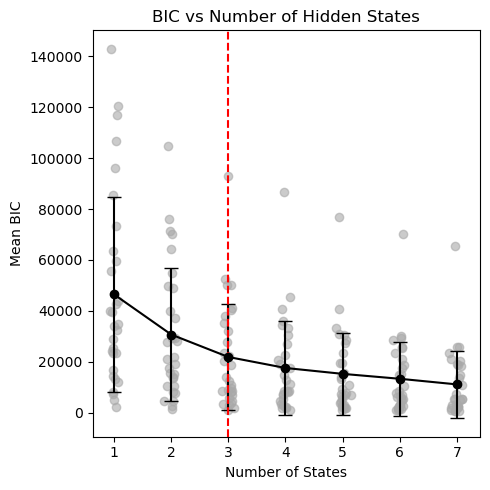

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Example LL data for 3, 4, and 5 states (replace with your actual data)

# Combine into one array
data = [bics_1, bics_2, bics_3, bics_4, bics_5, bics_6, bics_7]
labels = ['1 state', '2 states','3 states', '4 states', '5 states', '6 states', '7 states']



# Scatter plot
plt.figure(figsize=(5, 5))

for i, ll in enumerate(data):
    x = np.random.normal(i + 1, 0.05, size=len(ll))  # jitter for visibility
    plt.scatter(x, ll, alpha=0.6, label=labels[i], c='darkgray')
    
    # mean = np.mean(ll)
    # std = np.std(ll)
    # plt.errorbar(i + 2, mean, yerr=std, fmt='o', color='black', capsize=5)

data = np.array(data)
data = np.transpose(data)
mean_bic = np.mean(data, axis=0)
sd_bic = np.std(data, axis=0, ddof=1) 
states = np.arange(1, 1 + len(mean_bic))
plt.errorbar(states, mean_bic, yerr=sd_bic, fmt='-o',  color='black', capsize=5 )



# Customize axes

plt.title('BIC vs Number of Hidden States')
plt.xlabel('Number of States')
plt.ylabel('Mean BIC')


elbow_state = 3
plt.axvline(x=elbow_state, color='red', linestyle='--', label=f'Elbow (k={elbow_state})')
plt.xticks(states)
plt.tight_layout()

plt.savefig('bics.svg')


In [61]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(bics_1, bics_3, alternative='two-sided')  # if Model A has lower BIC
print(f"Wilcoxon p-value: {p:.3e}")


Wilcoxon p-value: 1.863e-09


In [53]:
bic_matrix.shape

(7, 30)

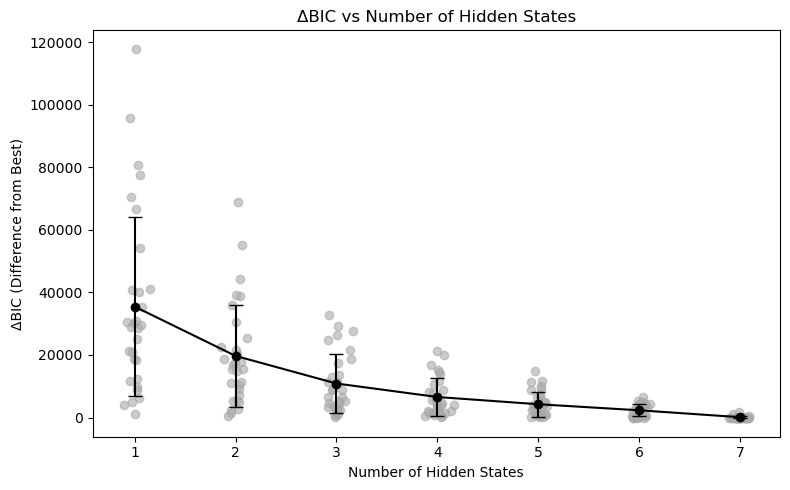

In [58]:
# Example: keys = number of states, values = list of BICs across sequences
bic_dict = {
    1: bics_1,
    2: bics_2,
    3: bics_3,
    4: bics_4,
    5:bics_5,
    6: bics_6,
    7: bics_7
}
import numpy as np
import matplotlib.pyplot as plt

# Convert bic_dict to an array
state_nums = sorted(bic_dict.keys())
bic_matrix = np.array([bic_dict[k] for k in state_nums])  # shape: (num_models, num_sequences)

# Compute min BIC per sequence
min_bic_per_sequence = np.min(bic_matrix, axis=0)

# Compute ΔBIC
delta_bic_matrix = bic_matrix - min_bic_per_sequence  # same shape
plt.figure(figsize=(8, 5))
for i, ll in enumerate(delta_bic_matrix):
    x = np.random.normal(i+1 , 0.05, size=len(ll))  # jitter for visibility
    plt.scatter(x, ll, alpha=0.6, c='darkgray')
    
# Compute mean and std for ΔBIC
delta_bic_mean = np.mean(delta_bic_matrix, axis=1)
delta_bic_std = np.std(delta_bic_matrix, axis=1)

# Plot

plt.errorbar(state_nums, delta_bic_mean, yerr=delta_bic_std, fmt='-o', capsize=5, color = 'black')
plt.xlabel('Number of Hidden States')
plt.ylabel('ΔBIC (Difference from Best)')
plt.title('ΔBIC vs Number of Hidden States')

plt.tight_layout()

plt.savefig('deltabic_bestmodel.svg')

In [44]:
import numpy as np

bic_means = np.array([np.mean(bics_2), np.mean(bics_3), np.mean(bics_4), np.mean(bics_5), np.mean(bics_6), np.mean(bics_7)])  # mean BIC per number of states
states = np.array([2, 3, 4, 5, 6, 7])

delta = np.diff(bic_means)
print("ΔBIC between states:", delta)

ΔBIC between states: [-8819.85281854 -4313.44067164 -2311.4160354  -1933.35576648
 -2204.9469855 ]


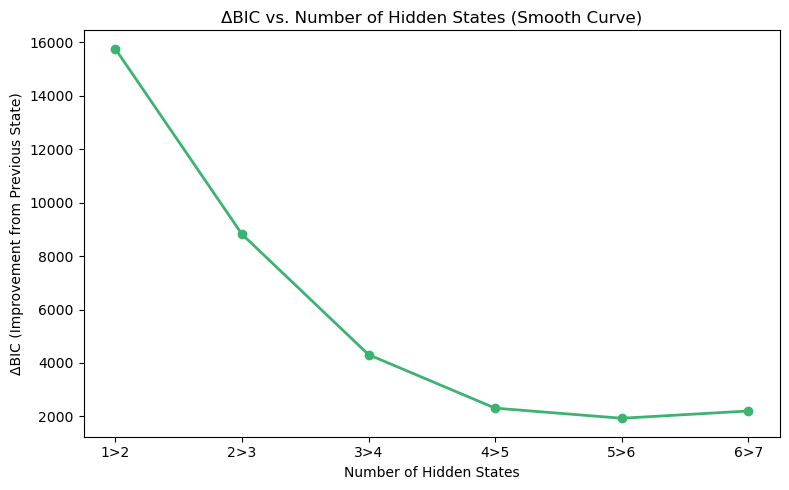

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Your mean BIC values (replace with your actual values)
bic_means = np.array([np.mean(bics_1), np.mean(bics_2), np.mean(bics_3), np.mean(bics_4),
                      np.mean(bics_5), np.mean(bics_6), np.mean(bics_7)])
states = np.array([1, 2, 3, 4, 5, 6, 7])

# Calculate ΔBIC between consecutive models
delta_bic = np.diff(bic_means)
delta_states = states[1:]  # These are the states where ΔBIC is defined

# Plot
plt.figure(figsize=(8, 5))
plt.plot(delta_states, -delta_bic, marker='o', linestyle='-', color='mediumseagreen', linewidth=2)
plt.xlabel("Number of Hidden States")
plt.ylabel("ΔBIC (Improvement from Previous State)")
plt.title("ΔBIC vs. Number of Hidden States (Smooth Curve)")
plt.xticks([2, 3, 4, 5, 6, 7], ['1>2', '2>3', '3>4', '4>5', '5>6', '6>7']
)
plt.tight_layout()
plt.savefig('deltabics_elbow.svg')